## Sprawozdanie z lab 13

Zaimplementuj w Google Colab w bibliotece PyTorch program z wykorzystaniem tensorów, w
którym obliczysz pole okręgu na podstawie algorytmu Monte Carlo. Program powinien
posiadać 2 wersje -> na CPU i GPU. Przestaw różnice w czasie obliczeń w zależności od
rozmiaru problemu (liczby losowanych punktów) dla CPU i GPU w postaci wykresów oraz
wniosków.

Importujemy biblioteki, potrzebne do rozwiazania danego zadania
PyTorch to biblioteka oprogramowania Python do uczenia maszynowego typu open source , która opiera się na Torch  (in) opracowanym przez Facebooka .

PyTorch umożliwia wykonanie obliczeń tensorowych niezbędnych w szczególności przy głębokim uczeniu się . Obliczenia te są optymalizowane i wykonywane przez procesor (CPU) lub, jeśli to możliwe, przez procesor graficzny ( GPU ) obsługujący CUDA . 

In [2]:
import torch
import matplotlib.pyplot as plt
import time as timer

Ten kawalek kodu jest funkcja, z liczba losowanych punktow i sposobem obliczen

In [3]:
def monte_carlo(n, device):
  # Generuj losowe punkty w zakresie (-1, 1)
  x = 2 * torch.rand(n, 2, device=device) - 1

  # Oblicz odległość punktów od środka
  distance = torch.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2)

  # Zlicz liczbę punktów w środku okręgu
  in_circle = (distance <= 1).sum().float()

  # Oblicz pole okręgu
  area = 4 * in_circle / n

  return area

Tutaj wprowadzamy nasze wartosci i mierzemy czas dla CPU i GPU

In [4]:
n_values = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
times_cpu = []
times_gpu = []

for n in n_values:
  # Obliczenia na CPU
  start = timer.time()
  area_cpu = monte_carlo(n, torch.device("cpu"))
  print("CPU - pole dla n =", n, " wynosi:", area_cpu)
  end = timer.time()
  times_cpu.append(end - start)

  # Obliczenia na GPU
  start = timer.time()
  area_gpu = monte_carlo(n, torch.device("cuda"))
  print("GPU - pole dla n =", n, " wynosi:", area_gpu)
  end = timer.time()
  times_gpu.append(end - start)

CPU - pole dla n = 10  wynosi: tensor(2.4000)
GPU - pole dla n = 10  wynosi: tensor(3.6000, device='cuda:0')
CPU - pole dla n = 100  wynosi: tensor(2.9600)
GPU - pole dla n = 100  wynosi: tensor(3., device='cuda:0')
CPU - pole dla n = 1000  wynosi: tensor(3.0840)
GPU - pole dla n = 1000  wynosi: tensor(3.2000, device='cuda:0')
CPU - pole dla n = 10000  wynosi: tensor(3.1560)
GPU - pole dla n = 10000  wynosi: tensor(3.1552, device='cuda:0')
CPU - pole dla n = 100000  wynosi: tensor(3.1361)
GPU - pole dla n = 100000  wynosi: tensor(3.1354, device='cuda:0')
CPU - pole dla n = 1000000  wynosi: tensor(3.1405)
GPU - pole dla n = 1000000  wynosi: tensor(3.1418, device='cuda:0')
CPU - pole dla n = 10000000  wynosi: tensor(3.1413)
GPU - pole dla n = 10000000  wynosi: tensor(3.1425, device='cuda:0')


Ten kod sluzy do wyswietlenia wynikow w postaci wykresu

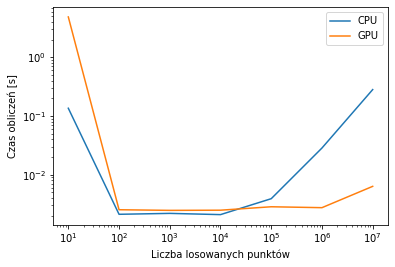

In [5]:
plt.plot(n_values, times_cpu, label='CPU')
plt.plot(n_values, times_gpu, label='GPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Liczba losowanych punktów')
plt.ylabel('Czas obliczeń [s]')
plt.legend()
plt.show()